<a href="https://colab.research.google.com/github/FadelI/cophil-eq/blob/main/tutorials/tut01_synth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic displacement
In this tutorial, we will look at synthetic displacement and how it looks on InSAR interferograms.
First, we will install the required packages. Uncomment the lines below to install the pacakges needed.

In [ ]:
# !pip install cutde
# !pip install okada_wrapper

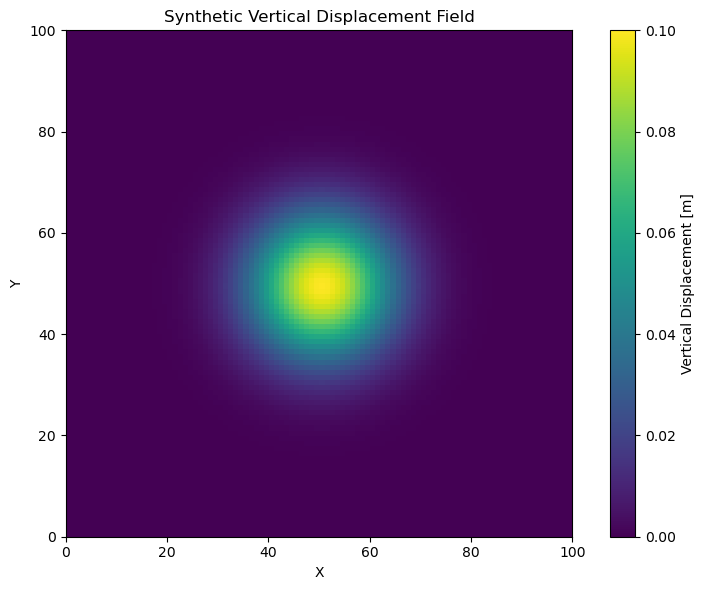

In [1]:
#%% Create a synthetic deisplacement field
import numpy as np
import matplotlib.pyplot as plt

# Create a gaussian displacement field
grid_size = 100
e = np.ones((grid_size, grid_size))         # 0 cm east
n = np.zeros((grid_size, grid_size))        # 0 cm north
u = np.zeros((grid_size, grid_size))        # 0 cm up

# Add a Gaussian displacement in the vertical direction
mean = grid_size / 2
std_dev = grid_size / 10
e = np.zeros((grid_size, grid_size))
n = np.zeros((grid_size, grid_size))
u = np.exp(-((np.arange(grid_size)[:, None] - mean) ** 2 +
             (np.arange(grid_size) - mean) ** 2) / (2 * std_dev ** 2))
u = u / np.max(u) * 0.1  # Scale to a maximum of 10 cm

# Plot the displacement field
plt.figure(figsize=(8, 6))
plt.imshow(u, cmap='viridis', extent=[0, grid_size, 0, grid_size])
plt.colorbar(label='Vertical Displacement [m]')
plt.title('Synthetic Vertical Displacement Field')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Now, we will try to see how the different SAR satellites with different bands (L, C, and X) see the deformation. 

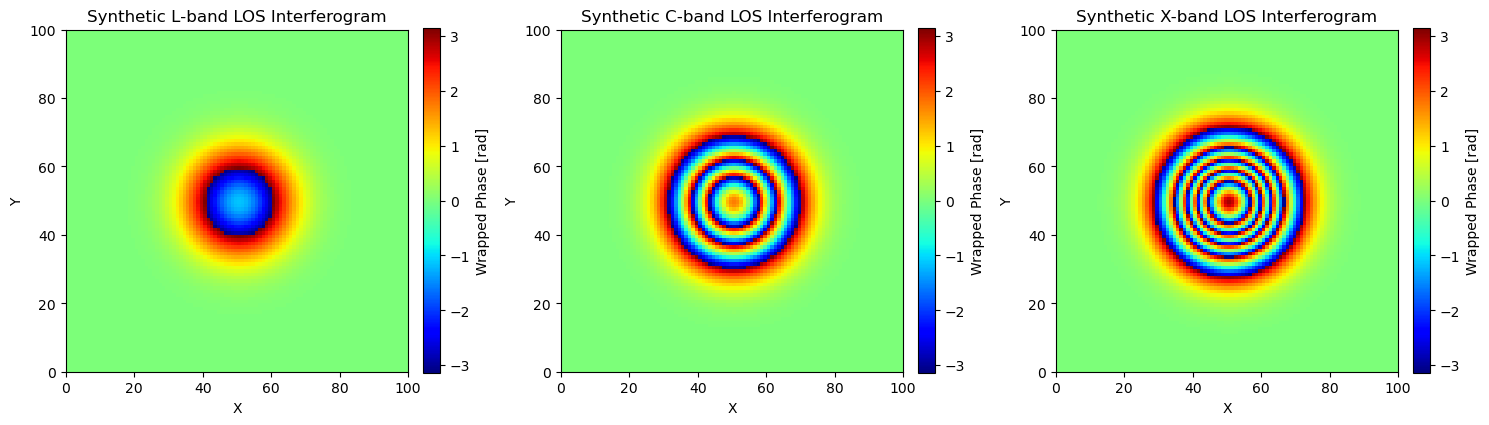

In [2]:
#%% Calculate the interferogram using wavelenegths for L, C, and X bands

# Assume satellite geometry
theta_deg = 35       # Incidence angle
heading_deg = -135   # Heading angle
theta = np.deg2rad(theta_deg)
phi = np.deg2rad(90 - heading_deg)

# LOS vector components
los_vector = np.array([
    -np.sin(theta) * np.sin(phi),  # East
    -np.sin(theta) * np.cos(phi),  # North
    np.cos(theta)                  # Up
])

# LOS projection
los_disp = e * los_vector[0] + n * los_vector[1] + u * los_vector[2]

# Wavelength of L, C, and X bands
wavelength_l = 0.2  # in meters (L-band radar)
wavelength_c = 0.05  # in meters (C-band radar)
wavelength_x = 0.03  # in meters (X-band radar)

# Interferometric phase
phase_x = (4 * np.pi / wavelength_x) * los_disp  # radians
phase_l = (4 * np.pi / wavelength_l) * los_disp  # radians
phase_c = (4 * np.pi / wavelength_c) * los_disp  # radians

# Optional: wrap phase to [-π, π]
wrapped_phase_x = np.angle(np.exp(1j * phase_x))
wrapped_phase_l = np.angle(np.exp(1j * phase_l))
wrapped_phase_c = np.angle(np.exp(1j * phase_c))

# Visualization 3 phases L, C and X band
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
im1 = plt.imshow(wrapped_phase_l, cmap='jet', extent=[0, grid_size, 0, grid_size],
           vmin=-np.pi, vmax=np.pi)
cbar1 = plt.colorbar(im1, label='Wrapped Phase [rad]', fraction=0.046, pad=0.04)
plt.title('Synthetic L-band LOS Interferogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(1, 3, 2)                
im2 = plt.imshow(wrapped_phase_c, cmap='jet', extent=[0, grid_size, 0, grid_size],
           vmin=-np.pi, vmax=np.pi)
cbar2 = plt.colorbar(im2, label='Wrapped Phase [rad]', fraction=0.046, pad=0.04)
plt.title('Synthetic C-band LOS Interferogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(1, 3, 3)
im3 = plt.imshow(wrapped_phase_x, cmap='jet', extent=[0, grid_size, 0, grid_size],
           vmin=-np.pi, vmax=np.pi)
cbar3 = plt.colorbar(im3, label='Wrapped Phase [rad]', fraction=0.046, pad=0.04)
plt.title('Synthetic X-band LOS Interferogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Now, we will see how the Sentinel-1 satellite sees this specific deformation.

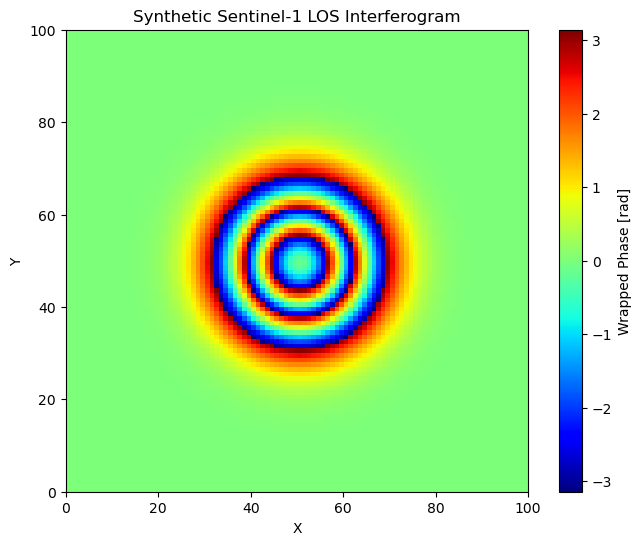

In [3]:
#%% Do the same for the Sentinel-1 configuration

# Sentinel-1 configuration
theta_deg = 39       # Incidence angle
heading_deg = -167   # Heading angle
theta = np.deg2rad(theta_deg)
phi = np.deg2rad(90 - heading_deg)
wavelength_s1 = 0.055  # Sentinel-1 C-band wavelength in meters

# Interferometric phase
phase = (4 * np.pi / wavelength_s1) * los_disp  # radians

# Optional: wrap phase to [-π, π]
wrapped_phase = np.angle(np.exp(1j * phase))

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(wrapped_phase, cmap='jet', extent=[0, grid_size, 0, grid_size],
           vmin=-np.pi, vmax=np.pi)
plt.colorbar(label='Wrapped Phase [rad]')
plt.title('Synthetic Sentinel-1 LOS Interferogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()